In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score
from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from matplotlib import colors
import seaborn as sns





In [5]:
import seaborn as sns
sns.set_style("whitegrid")

In [6]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_2.fea')

In [7]:
len(noun_sentence_df_final_joined_df_selected_columns_use_min)

287403

In [8]:
noun_sentence_df_final_joined_df_selected_columns_use_min = noun_sentence_df_final_joined_df_selected_columns_use_min.dropna()

In [9]:
noun_sentence_df_final_joined_df_selected_columns_use_min

,level_0,listingid,index,AVM_Error_List,Listing_Error_List,Transdate,Transprice,total_value,cj_living_area,effective_year_built,...,sentence_composition_0,sentence_composition_1,sentence_composition_2,sentence_composition_3,sentence_composition_4,sentence_composition_5,sentence_composition_6,sentence_composition_7,sentence_composition_8,transaction_year
0,26951,1071,new appliances,-0.038420,-0.018605,20171208,215000.0,143200.0,1730.0,1995.0,...,57.812500,17.187500,18.750000,1.562500,3.125,0.0,0.0,64.0,13.0,2017.0
1,16690,1079,new kitchen cabinets,-0.067666,-0.075000,20180116,240000.0,184190.0,2640.0,2000.0,...,57.894737,15.789474,24.561404,1.754386,0.000,0.0,0.0,57.0,16.0,2018.0
2,339290,1080,modern updates,0.085874,0.000000,20171227,389900.0,324300.0,3092.0,1997.0,...,52.941176,10.294118,30.882353,4.411765,0.000,0.0,0.0,68.0,18.0,2017.0
3,465962,1084,pool pump,-0.152460,0.000000,20180201,214900.0,201300.0,2600.0,1997.0,...,58.666667,10.666667,29.333333,4.000000,0.000,0.0,0.0,75.0,21.0,2018.0
4,338420,1097,kind home,-0.172517,0.017000,20180221,300000.0,313200.0,3217.0,2002.0,...,56.756757,12.162162,22.972973,2.702703,0.000,0.0,0.0,74.0,20.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287396,158364,251224438,great price,0.172898,-0.010101,20210622,445500.0,341967.0,2909.0,1980.0,...,51.470588,17.647059,27.941176,2.941176,0.000,0.0,0.0,68.0,17.0,2021.0
287397,251892,251227415,tremendous potential,-0.990750,0.333333,20210629,150000.0,215300.0,2157.0,1971.0,...,52.000000,22.000000,16.000000,4.000000,4.000,2.0,0.0,50.0,7.0,2021.0
287398,216617,251233929,great investment opportunity,-0.352831,0.064013,20210630,305440.0,242500.0,1930.0,1956.0,...,62.195122,13.414634,23.170732,1.219512,0.000,0.0,0.0,82.0,24.0,2021.0
287399,386096,251262429,great rental property,-0.359648,0.132275,20210630,94500.0,52978.0,1236.0,2000.0,...,68.852459,6.557377,22.950820,1.639344,0.000,0.0,0.0,61.0,18.0,2021.0


In [10]:
noun_sentence_df_final_joined_df_selected_columns_use_min.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'Transdate', 'Transprice', 'total_value', 'cj_living_area',
       'effective_year_built',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=566)

In [11]:
predictor_columns = ['cj_living_area', 'story', 'avmValue','bedrooms']

In [12]:
columns_selected = noun_sentence_df_final_joined_df_selected_columns_use_min.columns[\
                         pd.Series(noun_sentence_df_final_joined_df_selected_columns_use_min.columns).str.\
                        startswith('AVM_Error_Indicators')]
predictor_columns = predictor_columns + list(columns_selected)

columns_selected = noun_sentence_df_final_joined_df_selected_columns_use_min.columns[\
                                pd.Series(noun_sentence_df_final_joined_df_selected_columns_use_min.columns).str.\
                                                        startswith('Listing_Error_Indicators')]
predictor_columns = predictor_columns + list(columns_selected)

columns_selected = noun_sentence_df_final_joined_df_selected_columns_use_min.columns[\
                                pd.Series(noun_sentence_df_final_joined_df_selected_columns_use_min.columns).str.\
                                                            startswith('noun_sentence_corrections_embeddings')]
predictor_columns = predictor_columns + list(columns_selected)


In [13]:
predictor_columns = [  'AVM_Error_Indicators_1',
 'Listing_Error_Indicators_1',
 'AVM_Error_Indicators_scale',
 'cj_living_area',
 'Listing_Error_Indicators_8',
 'AVM_Error_Indicators_6',
 'AVM_Error_Indicators_5',
 'AVM_Error_Indicators_7',
 'AVM_Error_Indicators_11',
 'AVM_Error_Indicators_4',
 'AVM_Error_Indicators_10',
 'AVM_Error_Indicators_0',
 'avmValue']

In [14]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use_min.loc[:,predictor_columns].to_numpy()

In [15]:
Predictors.shape

(248918, 13)

In [16]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use_min.avmerror.values

In [17]:
predictand.shape

(248918,)

In [18]:
train_samples = 130000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [65]:
model = make_pipeline(
                                StandardScaler(),
                                MLPRegressor(
                                    hidden_layer_sizes=(7,6,5,4,2),
                                    activation = ('tanh'),
                                    early_stopping = False,
                                    random_state = 0,
                                    batch_size=100,
                                    tol=0.002,
                                    max_iter=300,
                                ),
                        )

In [66]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(activation='tanh', batch_size=100,
                              hidden_layer_sizes=(7, 6, 5, 4, 2), max_iter=300,
                              random_state=0, tol=0.002))])

In [67]:
print(model.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('mlpregressor', MLPRegressor(activation='tanh', batch_size=100,
             hidden_layer_sizes=(7, 6, 5, 4, 2), max_iter=300, random_state=0,
             tol=0.002))], 'verbose': False, 'standardscaler': StandardScaler(), 'mlpregressor': MLPRegressor(activation='tanh', batch_size=100,
             hidden_layer_sizes=(7, 6, 5, 4, 2), max_iter=300, random_state=0,
             tol=0.002), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'mlpregressor__activation': 'tanh', 'mlpregressor__alpha': 0.0001, 'mlpregressor__batch_size': 100, 'mlpregressor__beta_1': 0.9, 'mlpregressor__beta_2': 0.999, 'mlpregressor__early_stopping': False, 'mlpregressor__epsilon': 1e-08, 'mlpregressor__hidden_layer_sizes': (7, 6, 5, 4, 2), 'mlpregressor__learning_rate': 'constant', 'mlpregressor__learning_rate_init': 0.001, 'mlpregressor__max_fun': 15000, 'mlpregressor__max_iter': 300, 'mlpregres

In [54]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [55]:
y_train.min()

-1.4926238888888888

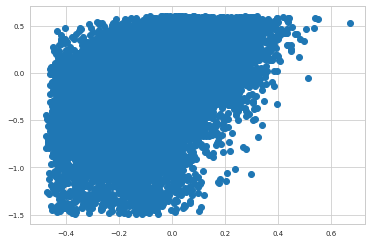

In [56]:
plt.plot(predictions_train,y_train,'o')

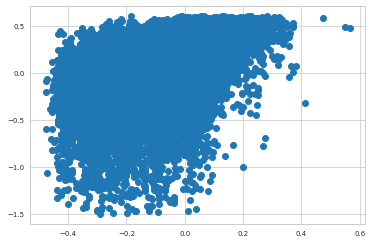

In [57]:
plt.plot(predictions_test,y_test,'o')

In [58]:
df = noun_sentence_df_final_joined_df_selected_columns_use_min.copy()


In [59]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [60]:
print(df.head(1)['avmValue'])
print(df.head(1)['Transprice'])
print(df.head(1)['avmerror'])
print(df.head(1)['avmValue']+df.head(1)['avmerror']*df.head(1)['avmValue'])
print((df.head(1)['Transprice']-df.head(1)['avmValue'])/df.head(1)['Transprice'])

0    223260.36
Name: avmValue, dtype: float64
0    215000.0
Name: Transprice, dtype: float64
0   -0.03842
Name: avmerror, dtype: float64
0    214682.634664
dtype: float64
0   -0.03842
dtype: float64


In [61]:
df.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'Transdate', 'Transprice', 'total_value', 'cj_living_area',
       'effective_year_built',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=566)

In [62]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.130126854324538
0.14169018917429063


In [63]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.12191479559943284
0.13222165736078226


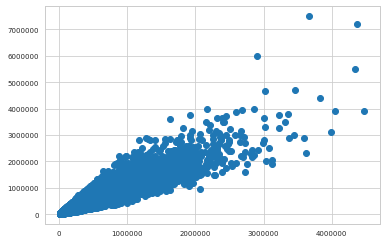

In [64]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [123]:
df.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'Transdate', 'Transprice', 'total_value', 'cj_living_area',
       'effective_year_built',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=566)

In [50]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [32]:
[features[i] for i in indices]

['noun_sentence_corrections_embeddings_301',
 'noun_sentence_corrections_embeddings_173',
 'noun_sentence_corrections_embeddings_138',
 'noun_sentence_corrections_embeddings_129',
 'noun_sentence_corrections_embeddings_241',
 'noun_sentence_corrections_embeddings_305',
 'noun_sentence_corrections_embeddings_462',
 'noun_sentence_corrections_embeddings_250',
 'noun_sentence_corrections_embeddings_414',
 'noun_sentence_corrections_embeddings_391',
 'noun_sentence_corrections_embeddings_39',
 'noun_sentence_corrections_embeddings_278',
 'noun_sentence_corrections_embeddings_122',
 'noun_sentence_corrections_embeddings_342',
 'noun_sentence_corrections_embeddings_139',
 'noun_sentence_corrections_embeddings_467',
 'noun_sentence_corrections_embeddings_105',
 'noun_sentence_corrections_embeddings_431',
 'noun_sentence_corrections_embeddings_235',
 'noun_sentence_corrections_embeddings_174',
 'noun_sentence_corrections_embeddings_118',
 'noun_sentence_corrections_embeddings_246',
 'noun_sent

In [ ]:
import joblib
filename = 'RF_newmodel_03_newset.sav'
joblib.dump(model,filename)